# Test of Piecewise Smooth Quadratic Estimators

In [8]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from interval import *
import psl_bounds as pl
import psqe_bounds as pq

Auxiliary plot routine

In [9]:
def plot_problem(flist, min_list, a, b):
    colors = ['r-', 'b-', 'g-', 'y-', 'm-', 'c-']
    step = (b - a) / 1000.
    ta = np.arange(a, b + step, step)
    num_points = len(ta)
    num_funcs = len(flist)

    fta = np.empty([num_funcs, num_points])
    print(fta)

    for i in range(num_funcs):
        for j in range(num_points):
            fta[i, j] = flist[i](ta[j])
    lb = np.amin(fta)
    ub = np.amax(fta)
    d = (ub - lb) * 0.1
    for i in range(num_funcs):
        plt.plot(ta, fta[i, :], colors[i])
    # for point in min_list:
    #     plt.scatter(point[0], point[1], s=20)
    plt.ylim([lb - d, ub + d])
    plt.axhline(y=0, linestyle='--', color='black')
    plt.text(0.5, 1, r'$\Phi(x)$', fontsize=18)
    plt.text(-0.2, 0.5, r'$f(x)$', fontsize=18)
    plt.text(-0.5, -2, r'$\phi(x)$', fontsize=18)
    plt.scatter(0.62, 0, s=22)
    plt.scatter(-0.22, 0, s=22)
    plt.scatter(-0.31, 0, s=22)
    plt.savefig('./first_root.png', dpi=500)
    plt.show()

Test problem

In [10]:
x = sym.symbols('x')
# e_f = x ** 3 + 2 * x ** 2 - 4 * x - 1
e_f = x ** 3 + 2 * x - 10 + sin(10 * x)

In [11]:
# x = sym.symbols('x')
# e_f = x ** 3 + 2 * x ** 2 - 4 * x-1+sin(x)
e_nf = -e_f
e_df = sym.diff(e_f)
e_ndf = -e_df
e_ddf = sym.diff(e_df)
e_nddf = -e_ddf
print(e_f, e_df, e_ddf)
module_sin = {"sin": sin}
module_cos = {"cos": cos}
f = sym.lambdify(x, e_f, modules=[module_sin, module_cos])
print('f', f(-1.))
print('f', f(2.))

nf = sym.lambdify(x, e_nf)
df = sym.lambdify(x, e_df, modules=[module_sin, module_cos])
ndf = sym.lambdify(x, e_ndf)
ddf = sym.lambdify(x, e_ddf, modules=[module_sin, module_cos])
nddf = sym.lambdify(x, e_nddf)
print(f(2.), df(2.))
a = -3.
b = 3.
idef = Interval([a, b])
di = df(idef)

# print(f(idef), df(idef), ddf(idef))
ddi = ddf(idef)
print(di, ddi)

x**3 + 2*x + sin(10*x) - 10 3*x**2 + 10*cos(10*x) + 2 6*x - 100*sin(10*x)
f -12.4559788891106
f 2.91294525072763
2.91294525072763 18.0808206181339
[-8, 39.0] [-118.0, 118.0]


In [12]:

# estim = pq.PSQE_Under(a, b, ddi.x[0], ddi.x[1], f, df)
l = max(-di.x[0], di.x[1])
L = max(-ddi.x[0], ddi.x[1])
# print(L)
estim_pl = pl.PSL_Bounds(a, b, di.x[0], di.x[1], f, True)
estim_plip = pl.PSL_Bounds(a, b, -l, l, f, True)
estim_pl_ob = pl.PSL_Bounds(a, b, di.x[0], di.x[1], f, False)

estim_int = pq.PSQE_Bounds(a, b, ddi.x[0], ddi.x[1], f, df, True)
estim_lip = pq.PSQE_Bounds(a, b, -L, L, f, df, True)
estim_int_ob = pq.PSQE_Bounds(a, b, ddi.x[0], ddi.x[1], f, df, False)

print(estim_pl)
print(estim_plip)
print(estim_int)
# print(estim_lip)
print(estim_int_ob)
min_list = [estim_int.lower_bound_and_point(),
            estim_int_ob.lower_bound_and_point()]
print(min_list)

Piecewise linear estimator a = -3.0, b = 3.0, c = 0.616511984003952, alp = -8, bet = 39.0, fa = -42.0119683759071, fb = 22.0119683759071
Piecewise linear estimator a = -3.0, b = 3.0, c = -0.820819701946337, alp = -39.0, bet = 39.0, fa = -42.0119683759071, fb = 22.0119683759071
Estimator a = -3.0, b = 3.0, c = -1.33159442056294, d = 1.66840557943706, alp = -118.0, bet = 118.0, fa = -42.0119683759071, fb = 22.0119683759071, dfa = 30.5425144988758, dfb = 30.5425144988758
Estimator a = -3.0, b = 3.0, c = -1.66840557943706, d = 1.33159442056294, alp = -118.0, bet = 118.0, fa = 42.0119683759071, fb = -22.0119683759071, dfa = -30.5425144988758, dfb = -30.5425144988758
[(0.0779762902395851, -272.512205984639), (-0.0779762902395853, 252.512205984639)]


Vizualize test problem

[[ 0.00000000e+000  3.98463943e-320  0.00000000e+000 ...  8.89318163e-322
   2.82368562e-314  2.12199580e-314]
 [ 2.37329638e-314  4.94065646e-324  4.94065646e-324 ...  2.82368962e-314
   1.74020930e+121  0.00000000e+000]
 [-1.86198177e-215  2.16504277e-314 -2.81825889e+154 ...  2.12199635e-314
   2.82369390e-314  2.12199591e-314]]


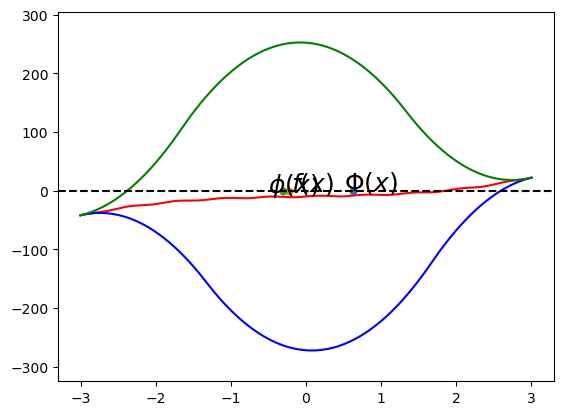

In [13]:
plot_problem([f, estim_int.estimator, estim_int_ob.nestimator], min_list, a, b)